### Load and Prepare Stock Data

Load Stock Data Using yfinance:

In [ ]:
import pandas as pd
# import yfinance as yf
# import numpy as np

In [9]:
import pandas as pd
import os

# Directory where the CSV files are stored
csv_dir = '/home/ayalk94/Documents/GitHub/week-long-challenge/Data/yfinance_data'

# List of CSV file names (replace with your actual file names)
csv_files = ['AAPL_historical_data.csv', 'AMZN_historical_data.csv', 'GOOG_historical_data.csv', 'META_historical_data.csv', 'MSFT_historical_data.csv', 'NVDA_historical_data.csv', 'TSLA_historical_data.csv']

# Initialize an empty list to store the DataFrames
dataframes = []

# Loop through each CSV file and load it into a DataFrame
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Option 1: Concatenate all the DataFrames into one DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Option 2: If they should be merged on a common column (e.g., date), use merge
# merged_df = dataframes[0]
# for df in dataframes[1:]:
#     merged_df = pd.merge(merged_df, df, on='date', how='inner')

# Display the first few rows of the combined DataFrame
print(combined_df.head())


         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [11]:


# Display basic information about the dataset
print(combined_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45428 entries, 0 to 45427
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          45428 non-null  object 
 1   Open          45428 non-null  float64
 2   High          45428 non-null  float64
 3   Low           45428 non-null  float64
 4   Close         45428 non-null  float64
 5   Adj Close     45428 non-null  float64
 6   Volume        45428 non-null  int64  
 7   Dividends     45428 non-null  float64
 8   Stock Splits  45428 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 3.1+ MB
None


In [13]:
# Display summary statistics for numeric columns
print(combined_df.describe())

               Open          High           Low         Close     Adj Close  \
count  45428.000000  45428.000000  45428.000000  45428.000000  45428.000000   
mean      46.798370     47.397792     46.190101     46.810590     45.367891   
std       78.259474     79.277620     77.218532     78.274673     78.049554   
min        0.034896      0.035547      0.033333      0.034115      0.031291   
25%        0.690500      0.708000      0.673541      0.693604      0.585204   
50%       13.646101     13.827710     13.463250     13.644750     13.076301   
75%       47.242501     47.720626     46.628125     47.193626     44.768961   
max      542.349976    542.809998    528.359985    539.909973    539.909973   

             Volume     Dividends  Stock Splits  
count  4.542800e+04  45428.000000  45428.000000  
mean   2.177785e+08      0.000847      0.002499  
std    3.076645e+08      0.022527      0.155291  
min    0.000000e+00      0.000000      0.000000  
25%    4.746455e+07      0.000000     

In [14]:
# Check for missing values
print(combined_df.isnull().sum())

# Drop rows with missing values in critical columns (e.g., Close price)
combined_df.dropna(subset=['Close'], inplace=True)

# Check for duplicate rows and remove them
combined_df.drop_duplicates(inplace=True)

# Ensure 'Date' is in datetime format
combined_df['Date'] = pd.to_datetime(combined_df['Date'], errors='coerce')

# Set 'Date' as the index for time series analysis
combined_df.set_index('Date', inplace=True)

# Display basic statistics of the combined data
print(combined_df.describe())


Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
               Open          High           Low         Close     Adj Close  \
count  45428.000000  45428.000000  45428.000000  45428.000000  45428.000000   
mean      46.798370     47.397792     46.190101     46.810590     45.367891   
std       78.259474     79.277620     77.218532     78.274673     78.049554   
min        0.034896      0.035547      0.033333      0.034115      0.031291   
25%        0.690500      0.708000      0.673541      0.693604      0.585204   
50%       13.646101     13.827710     13.463250     13.644750     13.076301   
75%       47.242501     47.720626     46.628125     47.193626     44.768961   
max      542.349976    542.809998    528.359985    539.909973    539.909973   

             Volume     Dividends  Stock Splits  
count  4.542800e+04  45428.000000  45428.000000  
mean   2.1777

### Data Distributions and Visualizations

#### Understanding the distribution of key variables such as Close, Volume, and their relationships helps in identifying any potential outliers or unusual patterns.

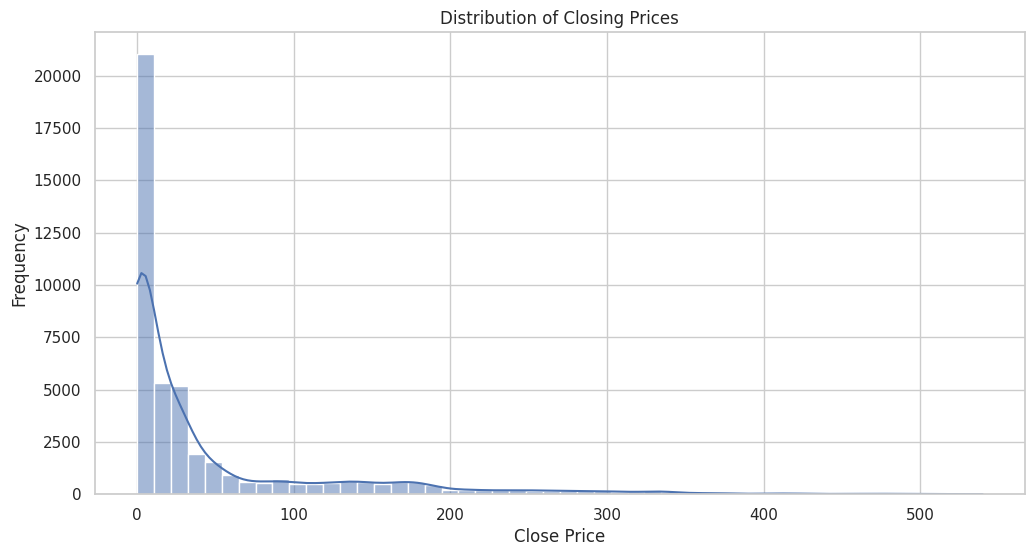

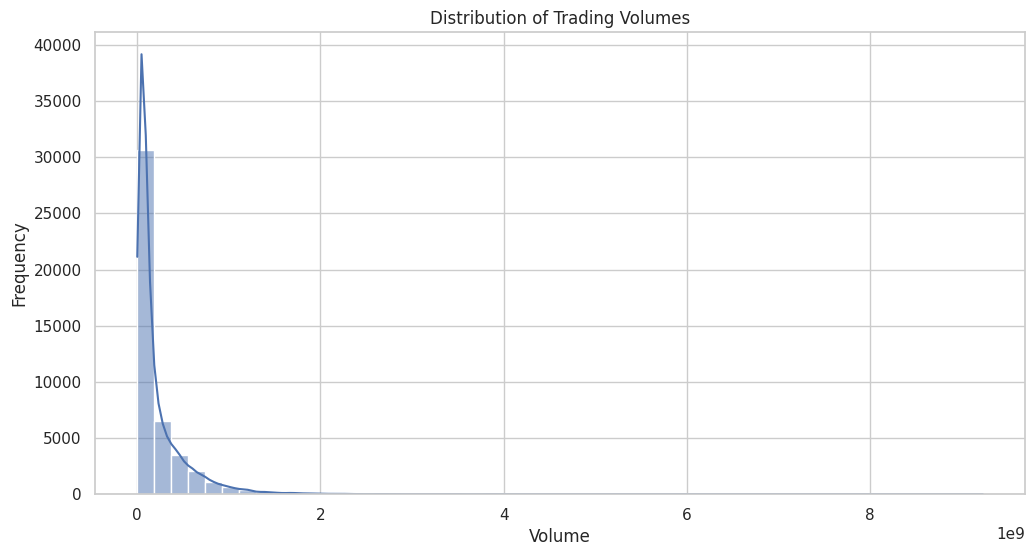

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configure Seaborn and plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Distribution of closing prices
sns.histplot(combined_df['Close'], bins=50, kde=True)
plt.title("Distribution of Closing Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()

# Distribution of trading volumes
sns.histplot(combined_df['Volume'], bins=50, kde=True)
plt.title("Distribution of Trading Volumes")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.show()


### Time Series Visualization

##### Time series plots allow you to observe trends and patterns over time, such as trends in the closing price, trading volume, and volatility.

/home/ayalk94/Documents/GitHub/week-long-challenge/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


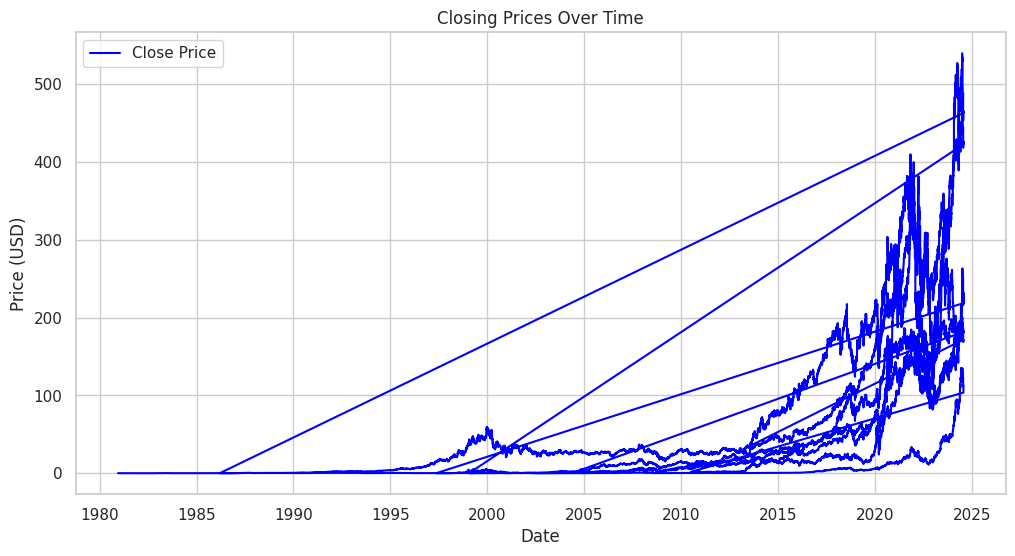

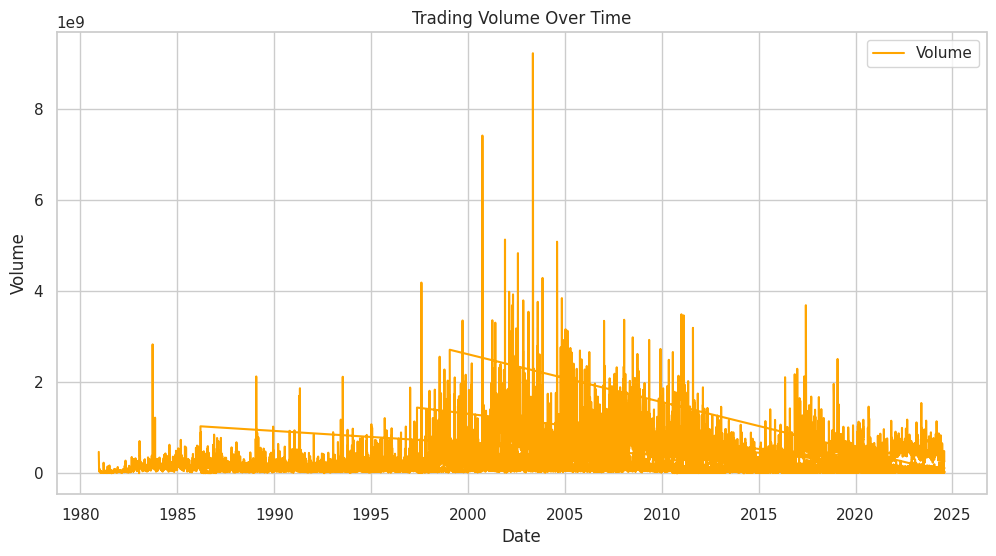

In [62]:
# Plot closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['Close'], label='Close Price', color='blue')
plt.title("Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.show()

# Plot trading volumes over time
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['Volume'], label='Volume', color='orange')
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(True)
plt.legend()
plt.show()


### Correlation Analysis

### Visualize the Data

KeyError: 'SMA'

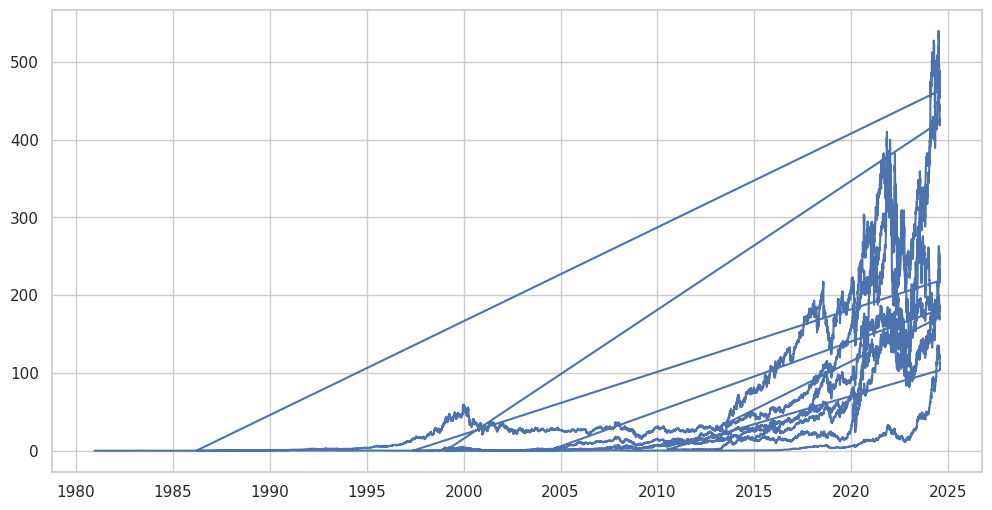

In [67]:
import matplotlib.pyplot as plt

# Plot Close price and Simple Moving Average (SMA)
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['Close'], label='Close Price')
plt.plot(combined_df.index, combined_df['SMA'], label='20-Day SMA', color='orange')
plt.title('Stock Close Price and Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot Relative Strength Index (RSI)
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['RSI'], label='RSI', color='green')
plt.axhline(y=70, color='red', linestyle='--')  # Overbought threshold
plt.axhline(y=30, color='blue', linestyle='--')  # Oversold threshold
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.grid(True)
plt.legend()
plt.show()

# Plot MACD and Signal Line
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['MACD'], label='MACD', color='purple')
plt.plot(combined_df.index, combined_df['MACD_signal'], label='Signal Line', color='red')
plt.fill_between(combined_df.index, combined_df['MACD_hist'], 0, alpha=0.5, label='MACD Histogram', color='gray')
plt.title('MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
combined_df.head(10)